In [1]:
#Read the database (json file in local) and turn it into a pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_json('filtered_recipes111.json')
print(df.head())

       id                                              title  servings  \
0  644094                                Funghetti Trifolati         6   
1  650112        Linefish Simmered In A Spiced Coconut Gravy         4   
2  661669  Stir Fry Mushrooms In Butter, Garlic And White...         4   
3  664708     Vegetarian Spring Rolls With Garlic Lime Sauce        10   
4  715493                     Slow Cooker Red Beans and Rice         5   

   pricePerServing  priceCalculated dishClass  \
0           144.27           24.045     Mixed   
1           586.70          146.675     Mixed   
2            97.58           24.395     Mixed   
3            85.99            8.599     Mixed   
4           161.12           32.224     Mixed   

                                           mealTypes      winePairing  vegan  \
0  antipasti, starter, snack, appetizer, antipast...  No wine pairing   True   
1              lunch, main course, main dish, dinner  No wine pairing  False   
2  antipasti, starte

In [ ]:
#Dataset exploration
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1888 non-null   int64  
 1   title            1888 non-null   object 
 2   servings         1888 non-null   int64  
 3   pricePerServing  1888 non-null   float64
 4   priceCalculated  1888 non-null   float64
 5   dishClass        1888 non-null   object 
 6   mealTypes        1888 non-null   object 
 7   winePairing      1888 non-null   object 
 8   vegan            1888 non-null   bool   
 9   glutenFree       1888 non-null   bool   
 10  vegetarian       1888 non-null   bool   
 11  dairyFree        1888 non-null   bool   
 12  isKosher         1888 non-null   bool   
 13  isHalal          1888 non-null   bool   
 14  restrictions     1888 non-null   object 
 15  ingredients      1888 non-null   object 
 16  seasons          1888 non-null   object 
 17  seasonText    

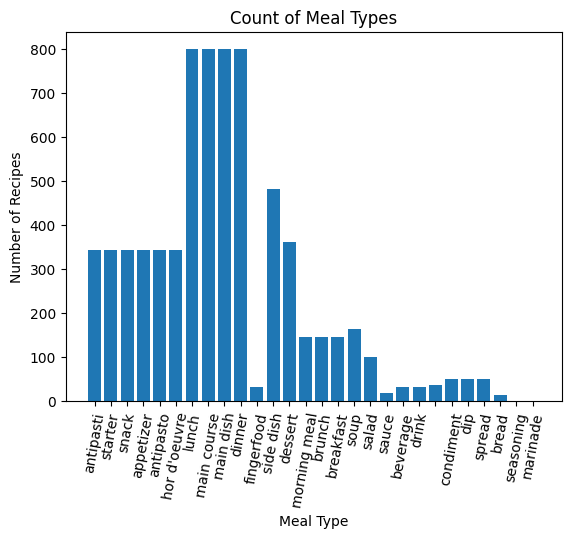

In [19]:
#En 'mealTypes' tengo una string con categorias separadas por ', ' de comida por cada receta. Quiero contar cuantas veces aparece cada categoria en todo el dataset
from collections import Counter
meal_types_list = df['mealTypes'].str.cat(sep=', ').split(', ')
meal_types_count = Counter(meal_types_list)
#plot a bar chart with meal types keys in x axis vertical
plt.bar(meal_types_count.keys(), meal_types_count.values())
plt.title('Count of Meal Types')
plt.xlabel('Meal Type')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=80)
plt.show()

Text(0, 0.5, 'Number of Recipes')

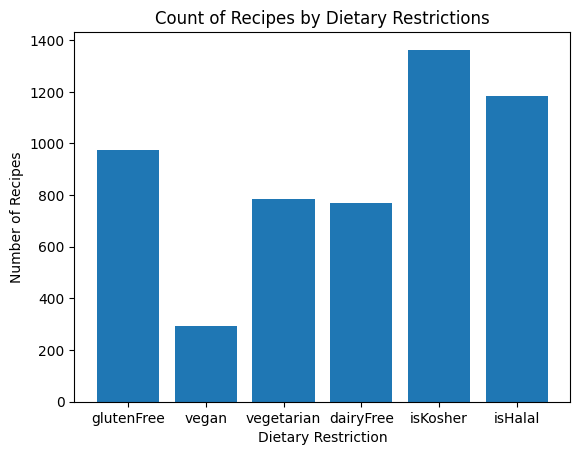

In [4]:
#Contar el numero de filas con cada columna booleana en True
boolean_columns = ['glutenFree', 'vegan', 'vegetarian', 'dairyFree', 'isKosher', 'isHalal']
count = {}
for col in boolean_columns:
    count[col] = df[col].sum()
#plot a bar chart
plt.bar(count.keys(), count.values())
plt.title('Count of Recipes by Dietary Restrictions')
plt.xlabel('Dietary Restriction')
plt.ylabel('Number of Recipes')

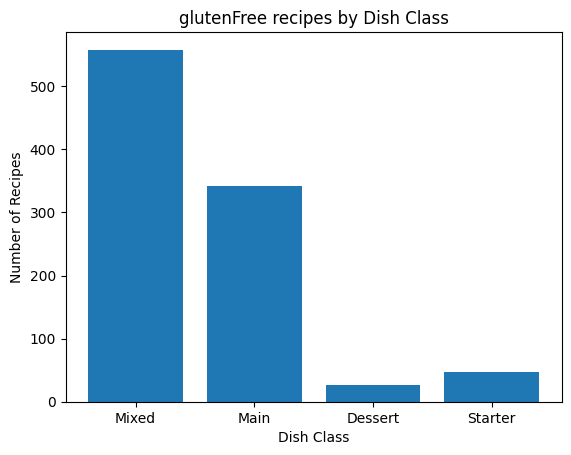

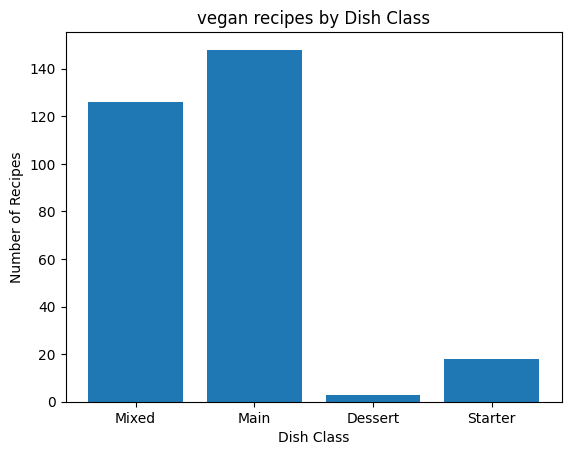

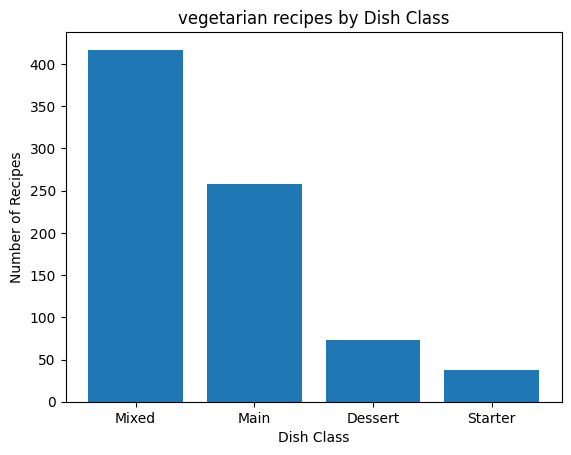

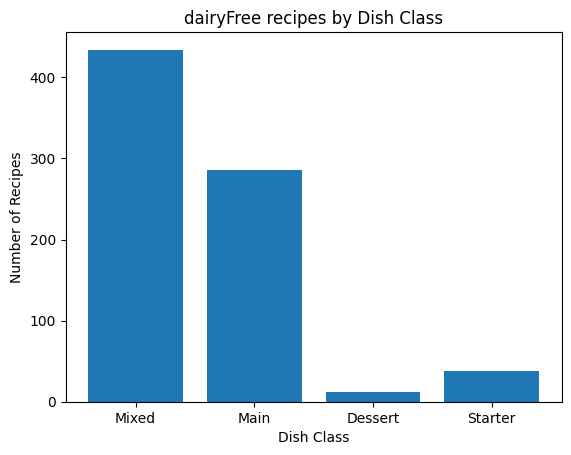

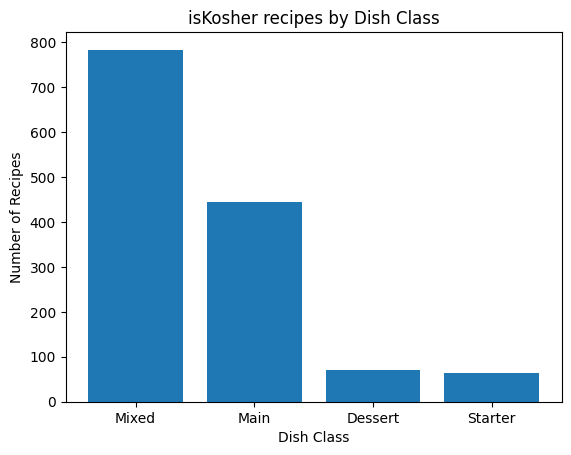

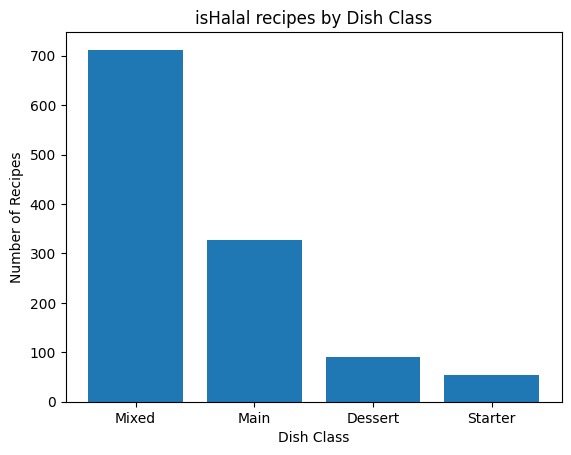

In [5]:
#Para cada columna booleana, contar el número de filas con cada categoría en dishClass
for col in boolean_columns:
    count = {}
    for dish_class in df['dishClass'].unique():
        count[dish_class] = df[df['dishClass'] == dish_class][col].sum()
    #plot a bar chart
    plt.bar(count.keys(), count.values())
    plt.title(f"{col} recipes by Dish Class")
    plt.xlabel('Dish Class')
    plt.ylabel('Number of Recipes')
    plt.show()  


In [6]:
#Discard columns not in instances
df = df.drop(columns=['servings', 'pricePerServing', 'seasonText', 'glutenFree', 'vegan', 'vegetarian', 'dairyFree', 'isKosher', 'isHalal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1888 non-null   int64  
 1   title            1888 non-null   object 
 2   priceCalculated  1888 non-null   float64
 3   dishClass        1888 non-null   object 
 4   mealTypes        1888 non-null   object 
 5   winePairing      1888 non-null   object 
 6   restrictions     1888 non-null   object 
 7   ingredients      1888 non-null   object 
 8   seasons          1888 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 132.9+ KB


In [17]:
print(df.columns)

Index(['id', 'title', 'priceCalculated', 'dishClass', 'mealTypes',
       'winePairing', 'restrictions', 'ingredients', 'seasons'],
      dtype='object')


In [8]:
#See unique values in each column
for column in ['restrictions', 'ingredients', 'seasons']:
        unique_values = set()
        for item in df[column]:
                unique_values.update(item)
        print(f"Column: {column}(list), Unique Values (num = {len(unique_values)}): {unique_values}")
for column in ['dishClass', 'winePairing']: # string type
        unique_values = set()
        for item in df[column]:
            l = item.strip(', ') 
            unique_values.add(l)
        print(f"Column: {column}(str), Unique Values (num = {len(unique_values)}): {unique_values}")

unique_values = set()
for item in df['mealTypes']:
    l = item.split(', ')
    unique_values.update(l)
    
print(f"Column: mealTypes (str), Unique Values (num = {len(unique_values)}): {unique_values}")



Column: restrictions(list), Unique Values (num = 4): {'vegan', 'gluten free', 'vegetarian', 'dairy free'}
Column: ingredients(list), Unique Values (num = 3608): {'better than bouillon beef base', 'overripe banana', 'sesame seeds to decorate', 'avarakkai / broad beans', 'coriander-for garnish', 'combination of herbs such as dill', 'gel food coloring', 'crossing over quintessential american desserts', 'hemp milk', 'hot-brewed coffee', 'tofu cubes', 'clementine orange segents', 'pasilla chile powder', 'coconut or', 'pinto beans', 'ground turkey meat', 'this is my favorite! rich and creamy', 'beefsteak tomatoes', 'egg roll wrappers', 'pita breads', 'seasoning cubes', 'flat parsely', 'marinated feta', 'strong coffee decoction', 'candlenuts', 'pork livers', 'rice paper', 'baking potaotes', 'salmon cutlet', 'sea salt - applewood works very', 'portobello mushrooms', 'angostura bitters', 'baking chocolate', 'env. meat marinade', 'pepper soup spice', 'chow mein noodles', 'milk ricotta cheese', '

In [9]:

#Check for inconsistent mealTypes entries
df[~df['mealTypes'].isin(['Main', 'Mixed', 'Starter', 'Dessert'])].head()

,id,title,priceCalculated,dishClass,mealTypes,winePairing,restrictions,ingredients,seasons
0,644094,Funghetti Trifolati,24.045,Mixed,"antipasti, starter, snack, appetizer, antipast...",No wine pairing,"[vegan, gluten free, vegetarian, dairy free]","[extra virgin olive oil, garlic, variety of mu...",[any-season]
1,650112,Linefish Simmered In A Spiced Coconut Gravy,146.675,Mixed,"lunch, main course, main dish, dinner",No wine pairing,"[gluten free, dairy free]","[garlic, thumb-sized piece of ginger, chilli p...",[any-season]
2,661669,"Stir Fry Mushrooms In Butter, Garlic And White...",24.395,Mixed,"antipasti, starter, snack, appetizer, antipast...",No wine pairing,[gluten free],"[shitaki mushrooms, mushroom, garlic, butter, ...",[any-season]
3,664708,Vegetarian Spring Rolls With Garlic Lime Sauce,8.599,Mixed,"fingerfood, antipasti, starter, snack, appetiz...",No wine pairing,"[gluten free, dairy free]","[butter leaf lettuce, carrots, ginger, hoisin ...",[any-season]
4,715493,Slow Cooker Red Beans and Rice,32.224,Mixed,"side dish, lunch, main course, main dish, dinner",No wine pairing,[gluten free],"[ancho chili powder, bay leaves, butter, beans...",[any-season]


Estadísticos de la columna 'priceCalculated':
Media: 99.80403338979383
Mediana: 34.27125
Max: 3892.71
Min: 0.0495


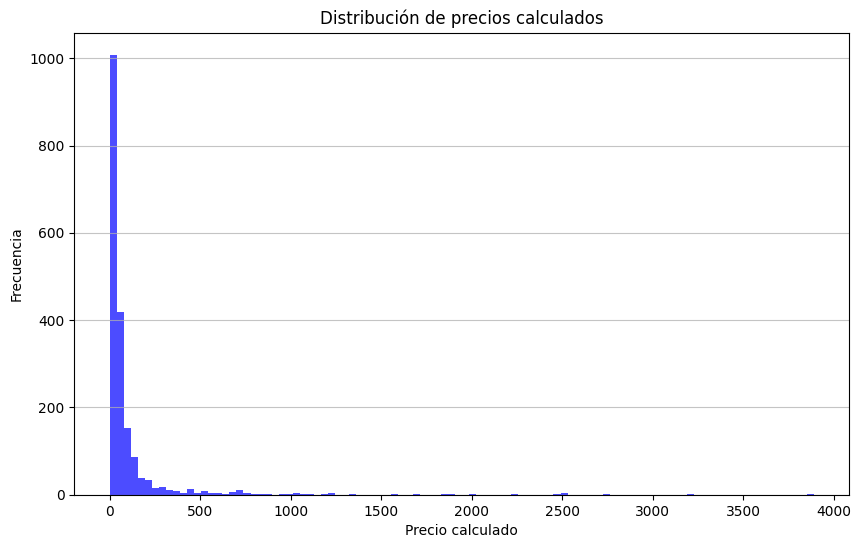

In [10]:
#Sacar estadisticos y graficar la columna priceCalculated 
import numpy as np
print("Estadísticos de la columna 'priceCalculated':")
print(f"Media: {np.mean(df['priceCalculated'])}")
print(f"Mediana: {np.median(df['priceCalculated'])}")
print(f"Max: {np.max(df['priceCalculated'])}")
print(f"Min: {np.min(df['priceCalculated'])}")

plt.figure(figsize=(10, 6))
plt.hist(df['priceCalculated'], bins=100, color='blue', alpha=0.7)
plt.title('Distribución de precios calculados')
plt.xlabel('Precio calculado')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()
